# Title :: spam SMS detection

# import google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# importing the libraries

In [2]:
import numpy as np 
import pandas as pd 
import nltk

# Read the data set from google drive

In [40]:
import pandas
df_sms = pd.read_csv('/content/drive/MyDrive/pattern lab/spam.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Dropping the unwanted columns

In [41]:
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()
messages=df_sms

# Checking the maximum length of SMS

In [5]:
print(len(df_sms))

5572


# Number of observations in each label spam and ham

In [6]:
df_sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


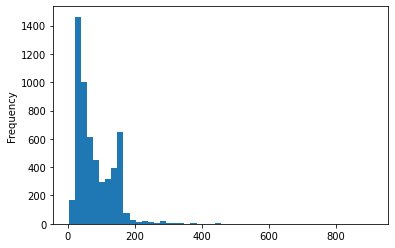

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_sms['length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7e5506090>,
      dtype=object)

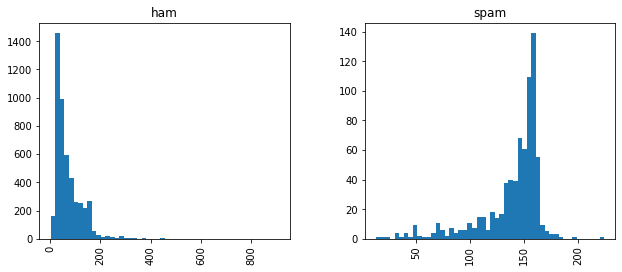

In [10]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))

In [11]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Implementation of Bag of Words Approach

In [12]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

In [13]:
lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [14]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

In [15]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

In [16]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [18]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [19]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [20]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)

In [22]:
count_vector = CountVectorizer()

# Implementation of Multinomial Naive Bayes Machine Learning Algorithm 

In [23]:
training_data = count_vector.fit_transform(X_train)

In [24]:
testing_data = count_vector.transform(X_test)

In [25]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
predictions = naive_bayes.predict(testing_data)

# Evaluating our SMS Spam Detection Model

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrice = confusion_matrix(y_test,predictions)
matrice

array([[968,   8],
       [  9, 130]])

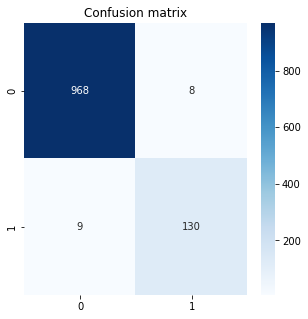

In [30]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrice,columns=[0,1],index=[0,1])
plt.figure(figsize=(5,5))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix")
plt.show()

In [31]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [43]:

messages.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
messages.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [45]:
duplicatedRow = messages[messages.duplicated()]
print(duplicatedRow[:5])

    label                                                sms
102   ham  As per your request 'Melle Melle (Oru Minnamin...
153   ham  As per your request 'Melle Melle (Oru Minnamin...
206   ham  As I entered my cabin my PA said, '' Happy B'd...
222   ham                             Sorry, I'll call later
325   ham                   No calls..messages..missed calls


In [46]:
messages.groupby('label').describe().T

label                          ham                                               spam
sms count                     4825                                                747
    unique                    4516                                                653
    top     Sorry, I'll call later  Please call our customer service representativ...
    freq                        30                                                  4

In [51]:
# Get all the ham and spam emails
ham_msg = messages[messages.label =='ham']
spam_msg = messages[messages.label=='spam']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.sms.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.sms.to_numpy().tolist())

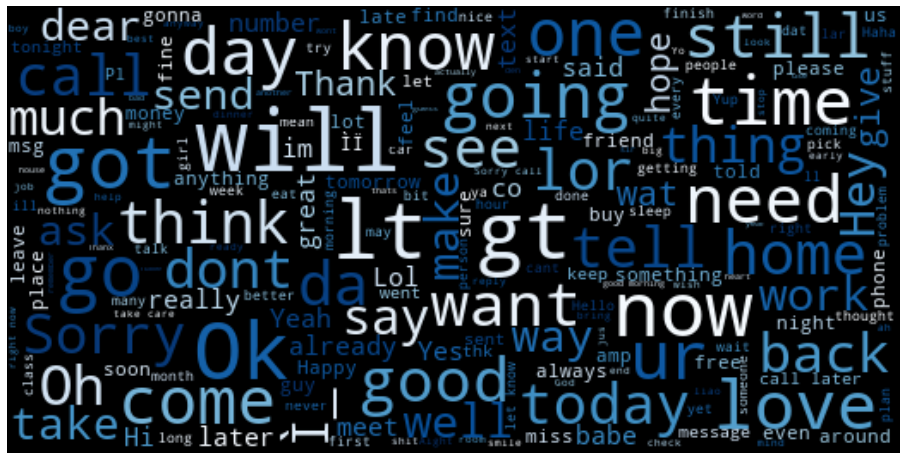

In [52]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


15.481865284974095

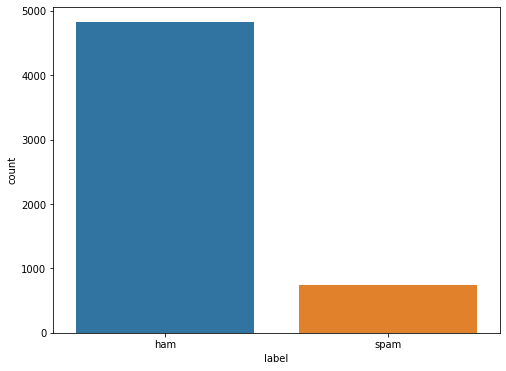

In [54]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(messages.label)
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100 # 15.48%

In [55]:
# one way to fix it is to downsample the ham msg
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(747, 2) (747, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Message types')

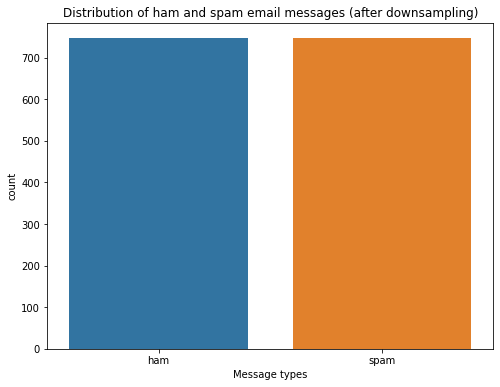

In [56]:
# Create a dataframe with these ham and spam msg
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [58]:
# Get length column for each text
msg_df['text_length'] = msg_df['sms'].apply(len)
#Calculate average length by label types
labels = msg_df.groupby('label').mean()
labels

,text_length
label,
ham,69.626506
spam,138.866131


In [60]:
# Map ham label as 0 and spam as 1
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values
# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['sms'], msg_label, test_size=0.2, random_state=434)

In [61]:
# Defining pre-processing hyperparameters
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [62]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [63]:
# Get the word_index 
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 'now': 11,
 'is': 12,
 '2': 13,
 'and': 14,
 'free': 15,
 'in': 16,
 'or': 17,
 'have': 18,
 'on': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 'with': 23,
 'are': 24,
 '4': 25,
 'from': 26,
 'me': 27,
 'text': 28,
 'get': 29,
 'stop': 30,
 'mobile': 31,
 'my': 32,
 'this': 33,
 'be': 34,
 'just': 35,
 'claim': 36,
 'only': 37,
 'it': 38,
 'reply': 39,
 'that': 40,
 'www': 41,
 'no': 42,
 'out': 43,
 'will': 44,
 'at': 45,
 'we': 46,
 'do': 47,
 'so': 48,
 'send': 49,
 'our': 50,
 'not': 51,
 'prize': 52,
 'new': 53,
 'if': 54,
 'cash': 55,
 'but': 56,
 'go': 57,
 'can': 58,
 '150p': 59,
 'up': 60,
 'uk': 61,
 "i'm": 62,
 'please': 63,
 'nokia': 64,
 'who': 65,
 'win': 66,
 't': 67,
 'won': 68,
 '1': 69,
 'all': 70,
 'tone': 71,
 'what': 72,
 'week': 73,
 'com': 74,
 'been': 75,
 'msg': 76,
 'want': 77,
 'phone': 78,
 'know': 79,
 '50': 80,
 'service': 81,
 'by': 82,
 'urgent': 83,
 '

In [65]:
# check how many words 
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)


There are 4054 unique tokens in training data. 


In [66]:
# Sequencing and padding on training and testing 
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [68]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)


Shape of training tensor:  (1195, 50)
Shape of testing tensor:  (299, 50)


In [69]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])

(27, 24)

In [70]:
# After padding
len(training_padded[0]), len(training_padded[1])

(50, 50)

In [71]:
print(training_padded[0])

[  1  37 200   8  31   1   3  24   1   2 241   2   7 148 264 127  31  10
  15   6   7  31 241  87  15  19   1   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


***Dense Spam Detection Model***

In [72]:
vocab_size = 500 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [73]:
#Dense model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [76]:
# fitting a dense spam detector model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 1s - loss: 0.6831 - accuracy: 0.7130 - val_loss: 0.6722 - val_accuracy: 0.7592
Epoch 2/30
38/38 - 0s - loss: 0.6531 - accuracy: 0.8268 - val_loss: 0.6317 - val_accuracy: 0.8227
Epoch 3/30
38/38 - 0s - loss: 0.5935 - accuracy: 0.8611 - val_loss: 0.5578 - val_accuracy: 0.8361
Epoch 4/30
38/38 - 0s - loss: 0.5069 - accuracy: 0.8745 - val_loss: 0.4723 - val_accuracy: 0.8629
Epoch 5/30
38/38 - 0s - loss: 0.4160 - accuracy: 0.8937 - val_loss: 0.3938 - val_accuracy: 0.8662
Epoch 6/30
38/38 - 0s - loss: 0.3416 - accuracy: 0.8996 - val_loss: 0.3313 - val_accuracy: 0.8863
Epoch 7/30
38/38 - 0s - loss: 0.2842 - accuracy: 0.9163 - val_loss: 0.2854 - val_accuracy: 0.8896
Epoch 8/30
38/38 - 0s - loss: 0.2427 - accuracy: 0.9247 - val_loss: 0.2419 - val_accuracy: 0.9130
Epoch 9/30
38/38 - 0s - loss: 0.2158 - accuracy: 0.9331 - val_loss: 0.2078 - val_accuracy: 0.9164
Epoch 10/30
38/38 - 0s - loss: 0.1833 - accuracy: 0.9481 - val_loss: 0.1819 - val_accuracy: 0.9298
Epoch 11/30
38/38 -

In [77]:
# Model performance on test data 
model.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9599


[0.08094522356987, 0.9598662257194519]

In [80]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

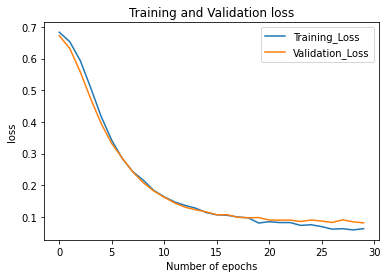

In [81]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

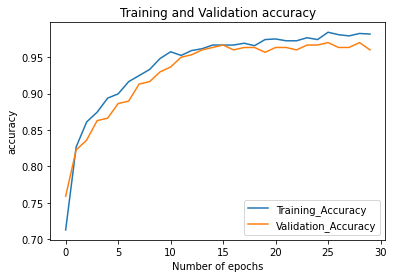

In [82]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

***Long Short Term Memory (LSTM) Model***

In [83]:
#LSTM hyperparameters
n_lstm = 20
drop_lstm =0.2

In [84]:
#LSTM Spam detection architecture
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [87]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [88]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 6s - loss: 0.6709 - accuracy: 0.6274 - val_loss: 0.5891 - val_accuracy: 0.6797
Epoch 2/30
38/38 - 2s - loss: 0.4083 - accuracy: 0.8544 - val_loss: 0.2677 - val_accuracy: 0.9334
Epoch 3/30
38/38 - 2s - loss: 0.2773 - accuracy: 0.9185 - val_loss: 0.2298 - val_accuracy: 0.9412
Epoch 4/30
38/38 - 2s - loss: 0.2221 - accuracy: 0.9378 - val_loss: 0.2025 - val_accuracy: 0.9419
Epoch 5/30
38/38 - 2s - loss: 0.1913 - accuracy: 0.9453 - val_loss: 0.1734 - val_accuracy: 0.9518
Epoch 6/30
38/38 - 2s - loss: 0.1822 - accuracy: 0.9449 - val_loss: 0.1796 - val_accuracy: 0.9492
Epoch 7/30
38/38 - 2s - loss: 0.1680 - accuracy: 0.9486 - val_loss: 0.1653 - val_accuracy: 0.9519
Epoch 8/30
38/38 - 2s - loss: 0.1555 - accuracy: 0.9535 - val_loss: 0.1881 - val_accuracy: 0.9463
Epoch 9/30
38/38 - 2s - loss: 0.1417 - accuracy: 0.9573 - val_loss: 0.1556 - val_accuracy: 0.9545
Epoch 10/30
38/38 - 2s - loss: 0.1472 - accuracy: 0.9523 - val_loss: 0.1548 - val_accuracy: 0.9520
Epoch 11/30
38/38 -

In [115]:
ls))

/bin/bash: -c: line 0: syntax error near unexpected token `)'
/bin/bash: -c: line 0: `ls -F --color ))'


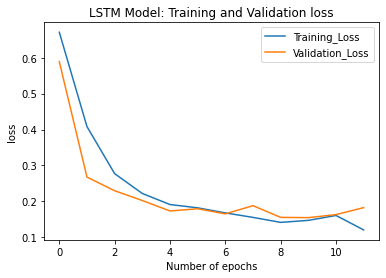

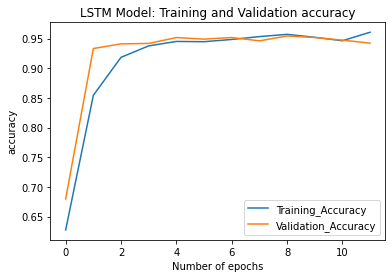

In [89]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

***Bi-directional Long Short Term Memory (BiLSTM) Model***

In [90]:
# Biderectional LSTM Spam detection architecture
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

In [91]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [92]:
# Training
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(training_padded, train_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 6s - loss: 0.6764 - accuracy: 0.6291 - val_loss: 0.6286 - val_accuracy: 0.6520
Epoch 2/30
38/38 - 1s - loss: 0.4585 - accuracy: 0.8438 - val_loss: 0.3053 - val_accuracy: 0.9107
Epoch 3/30
38/38 - 1s - loss: 0.2742 - accuracy: 0.9167 - val_loss: 0.2318 - val_accuracy: 0.9275
Epoch 4/30
38/38 - 1s - loss: 0.2068 - accuracy: 0.9409 - val_loss: 0.1850 - val_accuracy: 0.9457
Epoch 5/30
38/38 - 1s - loss: 0.1675 - accuracy: 0.9525 - val_loss: 0.1709 - val_accuracy: 0.9508
Epoch 6/30
38/38 - 1s - loss: 0.1443 - accuracy: 0.9590 - val_loss: 0.1248 - val_accuracy: 0.9666
Epoch 7/30
38/38 - 1s - loss: 0.1224 - accuracy: 0.9680 - val_loss: 0.1249 - val_accuracy: 0.9672
Epoch 8/30
38/38 - 1s - loss: 0.1065 - accuracy: 0.9730 - val_loss: 0.1265 - val_accuracy: 0.9660


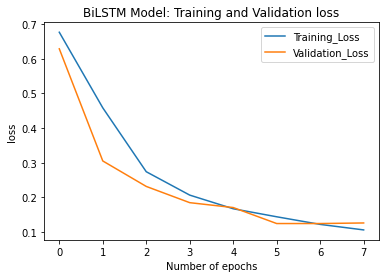

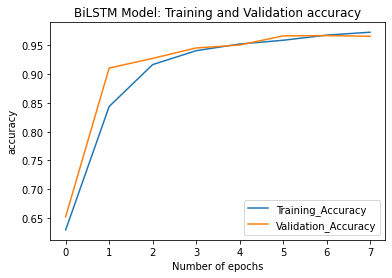

In [93]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')